## MLND capstone

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import display
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
np.random.seed(0)

## Data loading

In [2]:
#load data
df=pd.read_csv("appointment.csv")

## Data Exploration and preprocessing

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
#rename columns
df.rename(columns={
    'Hipertension':'Hypertension',
    'Handcap':'Handicap'
},inplace=True)

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
display(df.Age.head())
display(df.AppointmentID.head())
display(df.AppointmentDay.head())

0    62
1    56
2    62
3     8
4    56
Name: Age, dtype: int64

0    5642903
1    5642503
2    5642549
3    5642828
4    5642494
Name: AppointmentID, dtype: int64

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

** For convenience convert `AppointmentDay` and `ScheduledDay` to datetime type**. 

In [8]:
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df.ScheduledDay=df.ScheduledDay.apply(np.datetime64)

In [9]:
display(df.AppointmentDay.head())
display(df.ScheduledDay.head())

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]

Note: we see that `AppointmentDay` has the time portion vanished since the time is set to `00:00:00`.

** Checking for all error in data and NaN **

In [10]:
print('Age:',sorted(df.Age.unique()))
print('Gender:',df.Gender.unique())
print('No-show:',df['No-show'].unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Hypertension:',df.Hypertension.unique())
print('Handicap:',df.Handicap.unique())
print('Scholarship:',df.Scholarship.unique())
print('SMS_received:',df.SMS_received.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
No-show: ['No' 'Yes']
Diabetes: [0 1]
Alcoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]


From the previous cell we can see that we don't have any NaN entries. But we do have inappropriate values for `Age` (-1). I am going to consider age below 0 as wrong entries and remove those records.

In [11]:
#remove records with age less than 0
df=df[(df.Age>=0)]

**Looking at the given features, we can think of another feature called `wait_time`.   The `wait_time` column represents the number of days between `AppointmentDay` and `ScheduledDay`. ** 

In [12]:
#create new feature 'wait_time'
df['wait_time']=df['ScheduledDay']-df['AppointmentDay']
df['wait_time']=df['wait_time'].apply(abs)
df['wait_time']=(df['wait_time'] / np.timedelta64(1, 'D')).astype(int)
df[['ScheduledDay','AppointmentDay','wait_time']].head()

,ScheduledDay,AppointmentDay,wait_time
0,2016-04-29 18:38:08,2016-04-29,0
1,2016-04-29 16:08:27,2016-04-29,0
2,2016-04-29 16:19:04,2016-04-29,0
3,2016-04-29 17:29:31,2016-04-29,0
4,2016-04-29 16:07:23,2016-04-29,0


**Check for outliers in `wait_time`**

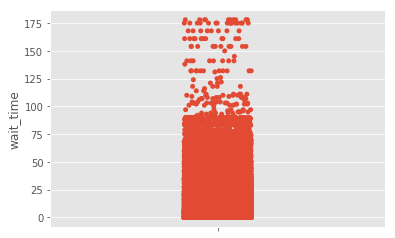

In [13]:
sns.stripplot(data = df, y = 'wait_time', jitter = True)
plt.show()

From the plot above, we see that there are fewer data points above `wait_time` value of `100`. But that is not enough to classify them as outliers. 

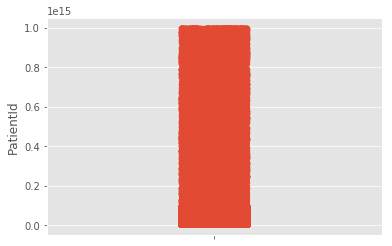

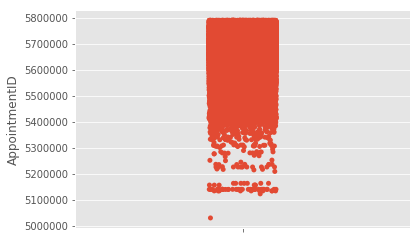

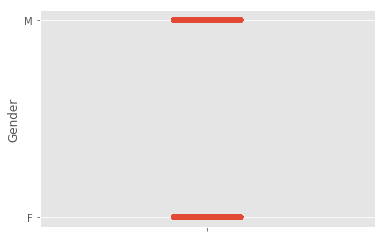

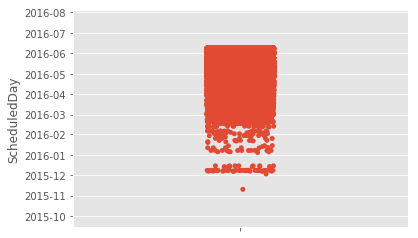

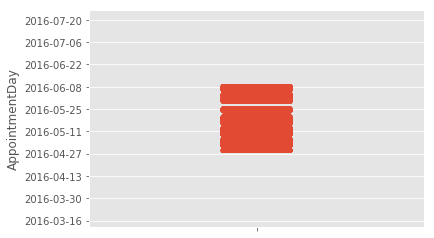

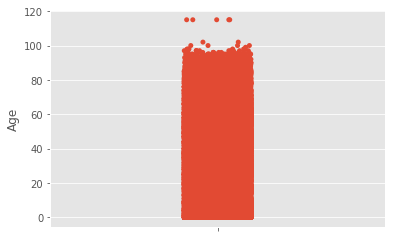

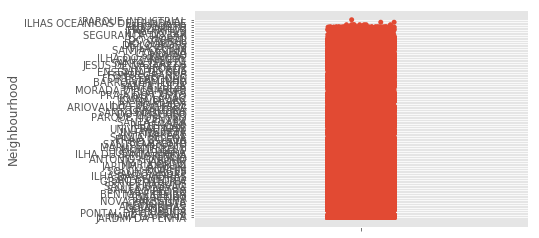

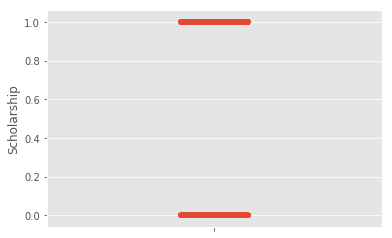

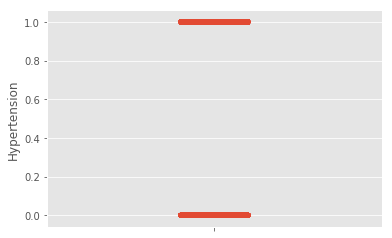

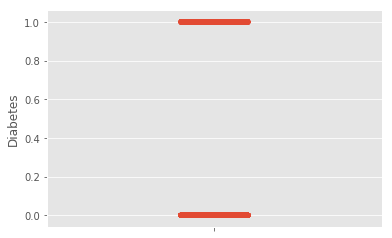

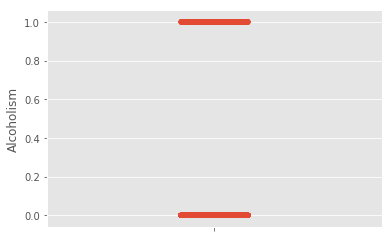

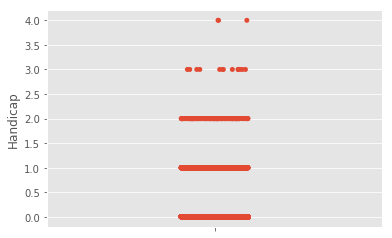

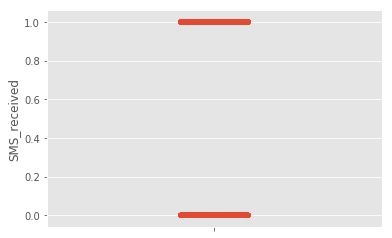

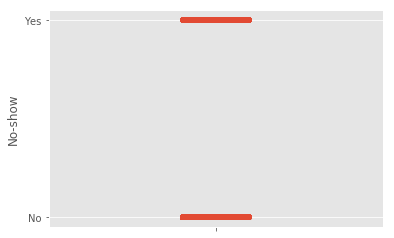

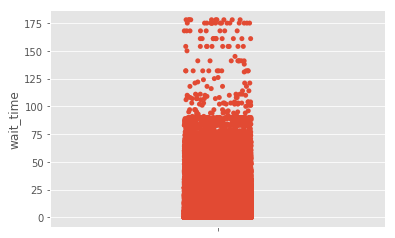

In [14]:

for c in df.columns:
    sns.stripplot(data = df, y =c, jitter = True)
    plt.show()

From plots above we can see that `Age` features has very few data points with value more than 100. I will be removing those points.

In [15]:
# remove records with `Age` more than 100
df=df[(df.Age<=100)]

**Rate of visit based on Gender**

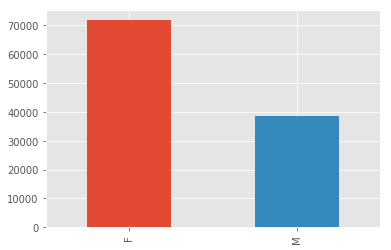

In [16]:
pd.value_counts(df['Gender']).plot.bar()

We see that women make almost two time the number of appointments made by men.

**Who plans ahead? (M or F)**

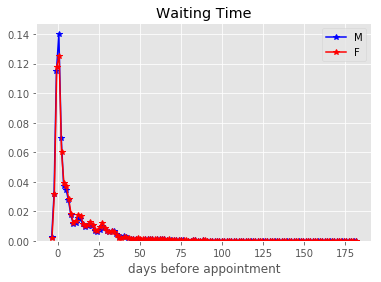

In [17]:
sns.kdeplot(df['wait_time'][df.Gender == 'M'],marker = '*', color = 'b')
sns.kdeplot(df['wait_time'][df.Gender == 'F'],marker ='*',color = 'r')
plt.title('Waiting Time')
plt.xlabel('days before appointment')
plt.legend(['M','F'])
plt.show()

Tendency to plan ahead seems to be similar across genders.

**Check for class imbalance. **

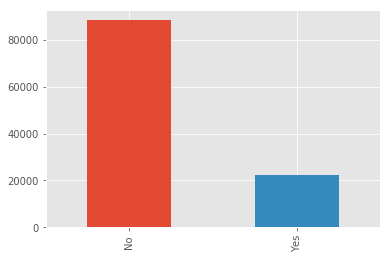

In [18]:
pd.value_counts(df['No-show']).plot.bar()

Note: The class is imbalanced. Only about 20% of the appointments are No-shows. Due to this imbalance, `accuracy_score` won't be a good metric. I will be using other metrics like `recall_score` , `AUC` and `f1_score`.

**Since it is a binary classifiction, and due to the nature of the problem being solved, it will be simple to map the  `label` values (`No-show`) to `1` and `0`.**

In [19]:
d={'No':0,'Yes':1}
df['No-show']=df['No-show'].replace(d)

**Remove unnecessary columns**

Since some of the columns are irrelevant for the predictive analysis, they can be removed before going ahead. The columns are :  
* `AppointmentDay` and `ScheduledDay` : These 2 columns are unnecessary since we already have `wait-time`.
* `PatientId` and `AppointmentID`: These 2 columns have no significance since they are just the indices of the records.

In [20]:
df.drop(columns=['AppointmentDay','ScheduledDay','PatientId','AppointmentID'],inplace=True)

**Analysis of the correlation of different features between each other**

In [21]:
df.corr()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,wait_time
Age,1.000000,-0.092427,0.504788,0.292544,0.095877,0.077382,0.012712,-0.060476,0.032726
Scholarship,-0.092427,1.000000,-0.019734,-0.024900,0.035018,-0.008521,0.001184,0.029147,-0.030080
Hypertension,0.504788,-0.019734,1.000000,0.433095,0.087971,0.080248,-0.006315,-0.035677,-0.018763
Diabetes,0.292544,-0.024900,0.433095,1.000000,0.018470,0.057628,-0.014559,-0.015172,-0.028086
Alcoholism,0.095877,0.035018,0.087971,0.018470,1.000000,0.004689,-0.026153,-0.000191,-0.037825
Handicap,0.077382,-0.008521,0.080248,0.057628,0.004689,1.000000,-0.024028,-0.006382,-0.019560
SMS_received,0.012712,0.001184,-0.006315,-0.014559,-0.026153,-0.024028,1.000000,0.126472,0.388198
No-show,-0.060476,0.029147,-0.035677,-0.015172,-0.000191,-0.006382,0.126472,1.000000,0.180077
wait_time,0.032726,-0.030080,-0.018763,-0.028086,-0.037825,-0.019560,0.388198,0.180077,1.000000


Note: The correlation between features doesn't seem significant enough. So, I won't be deleting any more features in this step.

**Split the data into features and labels.**

In [22]:
features=df.drop(columns=['No-show'])
features_one_hot_encoded=pd.get_dummies(features)
labels=df[['No-show']]

**Visual representation of the correlation matrix above**

In [23]:
features.corr()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,wait_time
Age,1.000000,-0.092427,0.504788,0.292544,0.095877,0.077382,0.012712,0.032726
Scholarship,-0.092427,1.000000,-0.019734,-0.024900,0.035018,-0.008521,0.001184,-0.030080
Hypertension,0.504788,-0.019734,1.000000,0.433095,0.087971,0.080248,-0.006315,-0.018763
Diabetes,0.292544,-0.024900,0.433095,1.000000,0.018470,0.057628,-0.014559,-0.028086
Alcoholism,0.095877,0.035018,0.087971,0.018470,1.000000,0.004689,-0.026153,-0.037825
Handicap,0.077382,-0.008521,0.080248,0.057628,0.004689,1.000000,-0.024028,-0.019560
SMS_received,0.012712,0.001184,-0.006315,-0.014559,-0.026153,-0.024028,1.000000,0.388198
wait_time,0.032726,-0.030080,-0.018763,-0.028086,-0.037825,-0.019560,0.388198,1.000000


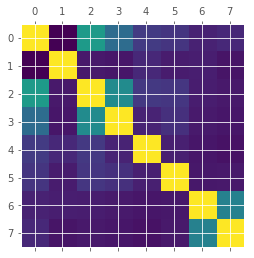

In [24]:
plt.matshow(pd.DataFrame(features.corr()))

## Benchmark model

A decision tree classifier is used as a benchmark model. It is a simple model. It doen't need a lot of data preprocessing. 

In [25]:
X_train, X_test, y_train, y_test  = train_test_split(features_one_hot_encoded, labels, test_size=0.2,random_state=1)


In [26]:
model= DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
print("f1_score:",metrics.f1_score(y_test,y_pred))
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
print("roc_auc :",metrics.roc_auc_score(y_test,y_pred))
print("recall  :",metrics.recall_score(y_test,y_pred))

f1_score: 0.305813385442
accuracy: 0.742851972494
roc_auc : 0.570799812985
recall  : 0.285714285714


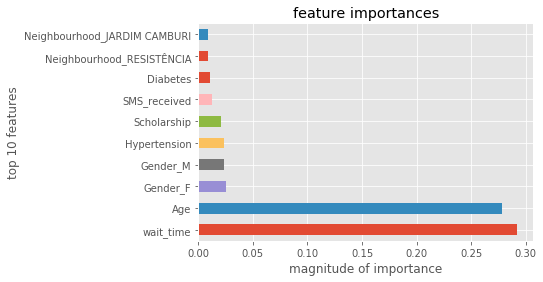

In [28]:
ax=plt.axes()
ax.set_title("feature importances")
ax.set_xlabel("magnitude of importance")
ax.set_ylabel("top 10 features")
pd.Series(model.feature_importances_, index=features_one_hot_encoded.columns).nlargest(10)\
.plot(kind='barh', ax=ax)

Note: From the above plot we can see that `Age` and `wait_time` seem to be the most important features. But we should also note that this model does not have good performance.  

## Model selection and tuning

In [29]:
# scale the dataset using standard scaler. 
#It will be benificial for some models that will be used. It won't hurt the tree based classifier.
#Also, split the data into train(70%), val(15%), test(15%) datasets
sc= StandardScaler()
features_one_hot_encoded_sc=sc.fit_transform(features_one_hot_encoded)
features_one_hot_encoded_sc=pd.DataFrame(features_one_hot_encoded_sc,columns=features_one_hot_encoded.columns)
X_train, X_test, y_train, y_test  = train_test_split(features_one_hot_encoded_sc, labels, test_size=0.3,random_state=0)
X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, test_size=0.5,random_state=0)

**Decision Tree Classifier**

In [30]:
# create the parameter grid for decision tree classifier
param_grid = {
              'base_estimator__min_samples_split':[2,5],
              'base_estimator__max_depth':[None,4,10],
              "n_estimators": [80],
              'base_estimator__class_weight':['balanced']              
}

In [31]:
#without grid search
ABC_simple = AdaBoostClassifier(DecisionTreeClassifier())
ABC_simple.fit(X_train,y_train.values.ravel())
y_pred= ABC_simple.predict(X_val)
print("f1_score:",metrics.f1_score(y_val,y_pred))
print("accuracy:",metrics.accuracy_score(y_val,y_pred))
print("roc_auc :",metrics.roc_auc_score(y_val,y_pred))
print("recall  :",metrics.recall_score(y_val,y_pred))

f1_score: 0.317193675889
accuracy: 0.749909518639
roc_auc : 0.576925731571
recall  : 0.284658587053


In [32]:
ABC = AdaBoostClassifier(DecisionTreeClassifier())
clf=GridSearchCV(ABC, param_grid,n_jobs=100,verbose=1,scoring='roc_auc')
_=clf.fit(X_train,y_train.values.ravel())

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=100)]: Done   9 out of  18 | elapsed:   58.3s remaining:   58.3s
[Parallel(n_jobs=100)]: Done  18 out of  18 | elapsed:  1.2min finished


In [33]:
clf.best_params_

{'base_estimator__class_weight': 'balanced',
 'base_estimator__max_depth': 4,
 'base_estimator__min_samples_split': 5,
 'n_estimators': 80}

In [34]:
tree_best_model=clf.best_estimator_
tree_best_model

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=80, random_state=None)

In [35]:
#performance on train data
model=clf.best_estimator_
y_pred= model.predict(X_train)
print("f1_score:",metrics.f1_score(y_train,y_pred))
print("accuracy:",metrics.accuracy_score(y_train,y_pred))
print("roc_auc :",metrics.roc_auc_score(y_train,y_pred))
print("recall  :",metrics.recall_score(y_train,y_pred))

f1_score: 0.477557027226
accuracy: 0.651254475654
roc_auc : 0.70256279527
recall  : 0.788679245283


In [36]:
#performance on val data
model=clf.best_estimator_
y_pred= model.predict(X_val)
print("f1_score:",metrics.f1_score(y_val,y_pred))
print("accuracy:",metrics.accuracy_score(y_val,y_pred))
print("roc_auc :",metrics.roc_auc_score(y_val,y_pred))
print("recall  :",metrics.recall_score(y_val,y_pred))

f1_score: 0.439610037913
accuracy: 0.625527807938
roc_auc : 0.660569750207
recall  : 0.719775347325


In [37]:
#performance on test data
model=clf.best_estimator_
y_pred= model.predict(X_test)
print("f1_score:",metrics.f1_score(y_test,y_pred))
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
print("roc_auc :",metrics.roc_auc_score(y_test,y_pred))
print("recall  :",metrics.recall_score(y_test,y_pred))

f1_score: 0.434566994214
accuracy: 0.628604174207
roc_auc : 0.661977846194
recall  : 0.717404487568


**Logistic Regression classifier**

In [38]:
# create the parameter grid for logistic regression
param_grid = {'base_estimator__C':[0.01,0.1,1,10,100],
                           "n_estimators": [80,160],
              'base_estimator__class_weight':['balanced'],
             }

In [39]:
ABC_simple = AdaBoostClassifier(LogisticRegression())
ABC_simple.fit(X_train,y_train.values.ravel())
y_pred= ABC_simple.predict(X_val)
print("f1_score:",metrics.f1_score(y_val,y_pred))
print("accuracy:",metrics.accuracy_score(y_val,y_pred))
print("roc_auc :",metrics.roc_auc_score(y_val,y_pred))
print("recall  :",metrics.recall_score(y_val,y_pred))

f1_score: 0.0316027088036
accuracy: 0.792978646399
roc_auc : 0.504297897664
recall  : 0.0165533550103


In [40]:
ABC = AdaBoostClassifier(LogisticRegression())
clf=GridSearchCV(ABC, param_grid,n_jobs=100,verbose=1,scoring='roc_auc')
clf.fit(X_train,y_train.values.ravel())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=100)]: Done  17 out of  30 | elapsed:  4.9min remaining:  3.7min
[Parallel(n_jobs=100)]: Done  30 out of  30 | elapsed:  5.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=100,
       param_grid={'base_estimator__C': [0.01, 0.1, 1, 10, 100], 'n_estimators': [80, 160], 'base_estimator__class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [41]:
clf.best_params_

{'base_estimator__C': 0.1,
 'base_estimator__class_weight': 'balanced',
 'n_estimators': 80}

In [42]:
logistic_regression_best_model=clf.best_estimator_
logistic_regression_best_model

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=80, random_state=None)

In [43]:
model=clf.best_estimator_
y_pred= model.predict(X_val)
print("f1_score:",metrics.f1_score(y_val,y_pred))
print("accuracy:",metrics.accuracy_score(y_val,y_pred))
print("roc_auc :",metrics.roc_auc_score(y_val,y_pred))
print("recall  :",metrics.recall_score(y_val,y_pred))

f1_score: 0.399475700746
accuracy: 0.640728676559
roc_auc : 0.620222101077
recall  : 0.585574933491


## PCA

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca= PCA()
pca.fit(features_one_hot_encoded_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [46]:
sum(pca.explained_variance_ratio_)

0.99999999999999956

Note: Since 

In [47]:
pca.explained_variance_ratio_.cumsum()

array([ 0.02343398,  0.04403413,  0.06086324,  0.07435248,  0.08648772,
        0.0983879 ,  0.11012177,  0.12162805,  0.13309034,  0.14448606,
        0.15584775,  0.1671883 ,  0.17851479,  0.18980813,  0.20109087,
        0.21236597,  0.22362117,  0.23487464,  0.24611744,  0.25734957,
        0.2685748 ,  0.27979394,  0.29100904,  0.30221451,  0.31341851,
        0.32461278,  0.3358013 ,  0.34698203,  0.35815625,  0.36932132,
        0.38047446,  0.39162367,  0.40276874,  0.41390166,  0.42503086,
        0.43615154,  0.4472711 ,  0.45837808,  0.46948344,  0.48058245,
        0.49167946,  0.50277033,  0.51385295,  0.52493071,  0.53600619,
        0.54708015,  0.55815369,  0.5692243 ,  0.58028887,  0.59135105,
        0.60241227,  0.61346735,  0.62451472,  0.63555935,  0.64660159,
        0.6576422 ,  0.66868033,  0.67971738,  0.69075247,  0.70178497,
        0.71281655,  0.72384614,  0.73487053,  0.74589313,  0.75691465,
        0.76793528,  0.7789525 ,  0.78996846,  0.80098319,  0.81